# Class Workbook {.tabset .tabset-fade .tabset-pills}

## In class activity

In [16]:
import numpy as np
import pandas as pd
#import math
from matplotlib.pyplot import subplots
#import statsmodels.api as sm
from plotnine import *
#import plotly.express as px
#import statsmodels.formula.api as sm
#import ISLP as islp

### Bank Credit Data

Please take a look at the following credit scoring data set. This data was used to predict defaults on consumer loans. The data contains  1000 rows and 21 variables:

In [17]:
credit_data=pd.read_csv("credit_data.csv")

Here are the variables.

- BAD: factor, GOOD/BAD for whether a customer has defaulted on a loan. This is the outcome or target in this dataset
- Account_status: factor, status of existing checking account
- Duration: numeric, loan duration in month
- Credit_history: factor, previous credit history
- Purpose: factor, loan purpose
- Amount: numeric, credit amount
- Savings: factor, savings account/bonds
- Employment: factor, present employment since
- Installment_rate: numeric, installment rate in percentage of disposable income
- Guarantors: factor, other debtors / guarantors
- Resident_since: factor, present residence since
- Property: factor, property
- Age: numeric, age in years
- Other_plans: factor, other installment plans (bank ,none, stores )
- Housing: factor, housing
- Num_credits: numeric, Number of existing credits at this bank
- Job: factor, job( management / self-employed / highly qualified employee / officer; skilled employee / official ; unemployed / unskilled - non-resident ; unskilled - resident )
- People_maintenance: numeric, number of people being liable to provide maintenance for
- Phone: factor, telephone (none ; yes, registered under the customers name )
- Foreign: factor, foreign worker ( no ; yes )
- Female: factor, female/male for gender

Create a predictive model that predicts the outcome `BAD`.

In [18]:
from sklearn.model_selection import train_test_split
# split the data
X_train, X_test, y_train, y_test = train_test_split(credit_data.loc[:,credit_data.columns != "BAD"], credit_data.loc[:,"BAD"], test_size=0.33, random_state=42)

credit_data_train  = pd.concat([X_train, y_train], axis=1)
credit_data_valid  = pd.concat([X_test, y_test], axis=1)

Evaluate your model performance.  What criteria do you think will be appropriate.

In [19]:
credit_data_train['BAD'] = credit_data_train['BAD'].map({'GOOD': 0, 'BAD': 1})
print(credit_data_train.dtypes)

Unnamed: 0             int64
Account_status        object
Duration               int64
Credit_history        object
Purpose               object
Amount                 int64
Savings               object
Employment            object
Installment_rate       int64
Guarantors            object
Resident_since         int64
Property              object
Age                    int64
Other_plans           object
Housing               object
Num_credits            int64
Job                   object
People_maintenance     int64
Phone                 object
Foreign               object
Female                object
BAD                    int64
dtype: object


Comment of the result:

~~~
Please write your answer in full sentences.


~~~

### Ames Housing data

Please take a look at the Ames Housing data.

In [20]:
ames_raw=pd.read_csv("ames_raw.csv")

Use data of `ames_raw` up to 2008 predict the housing price for the later years.

In [21]:
# Do feature engineering if needed.
ames_raw_2009, ames_raw_2008= ames_raw.query('`Yr Sold`>=2008').copy(), ames_raw.query('`Yr Sold` <2008').copy()

Use the same loss function calculator.

In [22]:
def calc_loss(prediction,actual):
  difpred = actual-prediction
  RMSE =pow(difpred.pow(2).mean(),1/2)
  operation_loss=abs(sum(difpred[difpred<0]))+sum(0.1*actual[difpred>0])
  return RMSE,operation_loss

Apply CART and try to interpret the result that you get.  Be sure to fit the models on a training set and evaluate their performance on a test set.  Does it have a good prediction accuracy?

In [23]:
#Apply CART and try to interpret the result that you get.  Be sure to fit the models on a training set and evaluate their performance on a test set.  Does it have a good prediction accuracy?
ames_raw=pd.read_csv("ames_raw.csv")
# Do feature engineering if needed.
ames_raw_2009, ames_raw_2008= ames_raw.query('`Yr Sold`>=2008').copy(), ames_raw.query('`Yr Sold` <2008').copy()

# Apply CART and try to interpret the result that you get.  Be sure to fit the models on a training set and evaluate their performance on a test set.  Does it have a good prediction accuracy?


Comment of the result:

~~~
Please write your answer in full sentences.


~~~

Apply boosting, bagging, random forests, and BART to the Ames Housing data set. Be sure to fit the models on a training set and evaluate their performance on a test set. How accurate are the results compared to simple linear regression methods? Which of these approaches yields the best performance?

In [24]:
#
#

Comment of the result:

~~~
Please write your answer in full sentences.


~~~

## Problem Set

### Boston


In Section 8.3.3, we applied random forests to the Boston data using max_features = 6 and using n_estimators = 100 and n_estimators = 500. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for max_features and n_estimators. You can model your plot after Figure 8.10. Describe the results obtained.

In [25]:
from ISLP import load_data
Boston = load_data("Boston")
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset 
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table 
from ISLP.models import ModelSpec as MS
from sklearn.tree import (DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR, plot_tree , export_text)
from sklearn.metrics import (accuracy_score ,log_loss) 
from sklearn.ensemble import (RandomForestClassifier as RFC, RandomForestRegressor as RFR, GradientBoostingClassifier as GBC, GradientBoostingRegressor as GBR)
from ISLP.bart import BART

###

In the lab, a classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable.

In [26]:
Carseats = load_data("Carseats")
Carseats.info()
Carseats.drop(columns=["ShelveLoc","Urban","US"],inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


(a) Split the data set into a training set and a test set.

In [27]:
#Split the data set into a training set and a test set.
X_train, X_test , y_train ,y_test = skm.train_test_split(Carseats.drop(columns="Sales"), Carseats['Sales'], test_size=0.3, random_state=0)

(b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

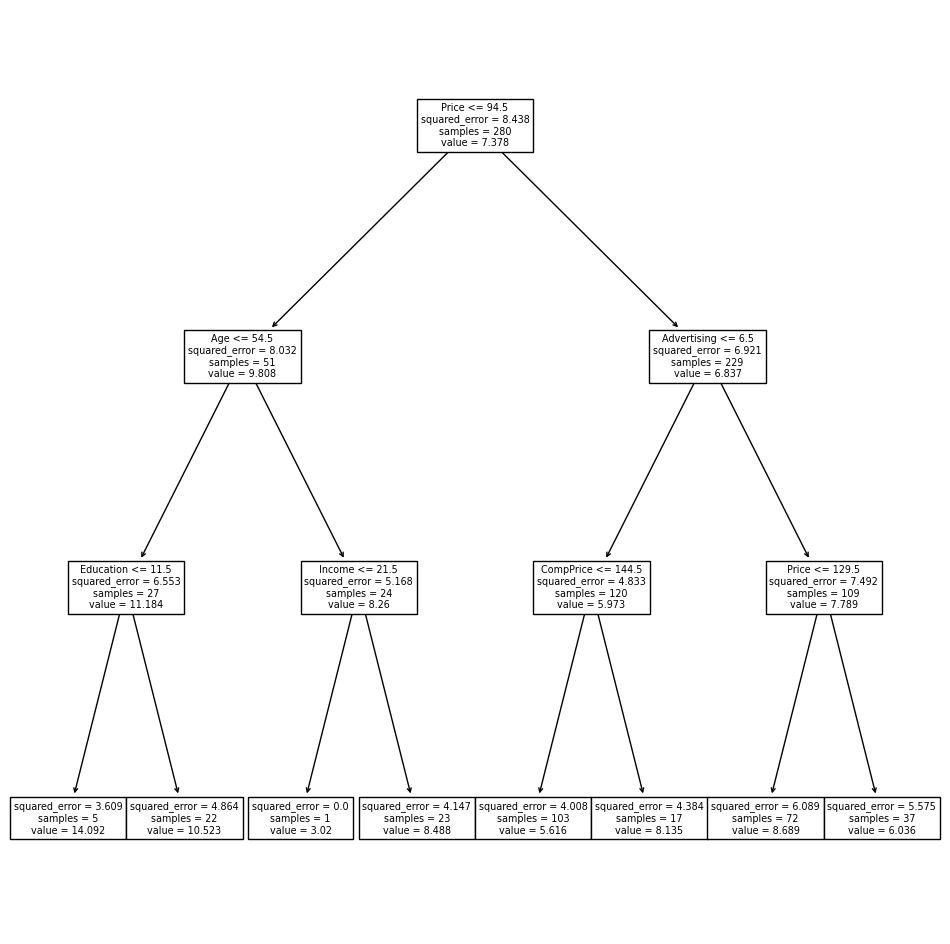

In [28]:
model = MS(Carseats.drop(columns="Sales"), intercept=False)
D = model.fit_transform(Carseats)
feature_names = list(D.columns)
X = np.asarray(D)
#Fit a regression tree to the training set.
reg = DTR(max_depth=3) 
reg.fit(X_train, y_train)
ax = subplots(figsize=(12,12))[1] 
plot_tree(reg,feature_names=feature_names, ax=ax);

(c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

In [29]:
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train) 
kfold = skm.KFold(5,shuffle=True,random_state=10) 
grid = skm.GridSearchCV(reg,{'ccp_alpha': ccp_path.ccp_alphas},
refit=True,
cv=kfold, scoring='neg_mean_squared_error')
G = grid.fit(X_train, y_train)
#we use the pruned tree to make predictions on the test set.
best_ = grid.best_estimator_
np.mean((y_test - best_.predict(X_test))**2)

6.535053583978944

(d) Use the bagging approach in order to analyze this data. What
test MSE do you obtain? Use the feature_importance_ values to
determine which variables are most important.

In [30]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators=100, max_features=7, random_state=0)
rf.fit(X_train, y_train)
np.mean((y_test - rf.predict(X_test))**2)

# use the feature importance attribute of the random forest to determine which predictors are most important.
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print(importances)
print(indices)

# which is the most important predictor?
print(Carseats.columns[indices[0]])




[0.17115024 0.08463363 0.12222674 0.07350591 0.34778531 0.15165604
 0.04904213]
[4 0 5 2 1 3 6]
Population


(e) Use random forests to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine
which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate
obtained.

In [31]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators=100, max_features=3, random_state=0)
rf.fit(X_train, y_train)
np.mean((y_test - rf.predict(X_test))**2)

# use the feature importance attribute of the random forest to determine which predictors are most important.
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print(importances)
print(indices)

# which is the most important predictor?
print(Carseats.columns[indices[0]])

[0.13743005 0.10299894 0.12857213 0.0985865  0.31296303 0.15928847
 0.06016089]
[4 5 0 2 1 3 6]
Population


### OJ

This problem involves the OJ data set which is part of the ISLR2 package.

In [32]:
# load OJ from ISLR2
import ISLP
OJ = ISLP.load_data("OJ")
OJ.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1070 non-null   int64  
 3   PriceCH         1070 non-null   float64
 4   PriceMM         1070 non-null   float64
 5   DiscCH          1070 non-null   float64
 6   DiscMM          1070 non-null   float64
 7   SpecialCH       1070 non-null   int64  
 8   SpecialMM       1070 non-null   int64  
 9   LoyalCH         1070 non-null   float64
 10  SalePriceMM     1070 non-null   float64
 11  SalePriceCH     1070 non-null   float64
 12  PriceDiff       1070 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1070 non-null   float64
 15  PctDiscCH       1070 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1070 non-null   i

(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

Your code:

In [33]:
# Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.
# Drop all String columns
# OJ.info()
# convert CH to 0, MM to 1 for Purchase
OJ.Purchase = OJ.Purchase.map({'CH':0, 'MM':1})
OJ = OJ.drop(columns=OJ.select_dtypes(include=['object']).columns)
OJ_train = OJ.sample(800, random_state=1)
OJ_test = OJ.drop(OJ_train.index)


Your answer:

~~~
Please write your answer in full sentences.


~~~

(b) Fit a tree to the training data, with Purchase as the response
and the other variables as predictors. What is the training error
rate?

Your code:

In [34]:
# Fit a tree to the training data with Purchase as the response and the other variables as predictors. present the training error rate.
# drop string

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

X_train = OJ_train.drop("Purchase", axis=1)
X_test = OJ_test.drop("Purchase", axis=1)
y_train = OJ_train["Purchase"]
y_test = OJ_test["Purchase"]

OJ_tree = DecisionTreeClassifier(random_state=1)
OJ_tree.fit(X_train, y_train)
y_pred = OJ_tree.predict(X_train)
accuracy_score(y_train, y_pred)


0.99

Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Create a plot of the tree, and interpret the results. How many terminal nodes does the tree have?
Your code:

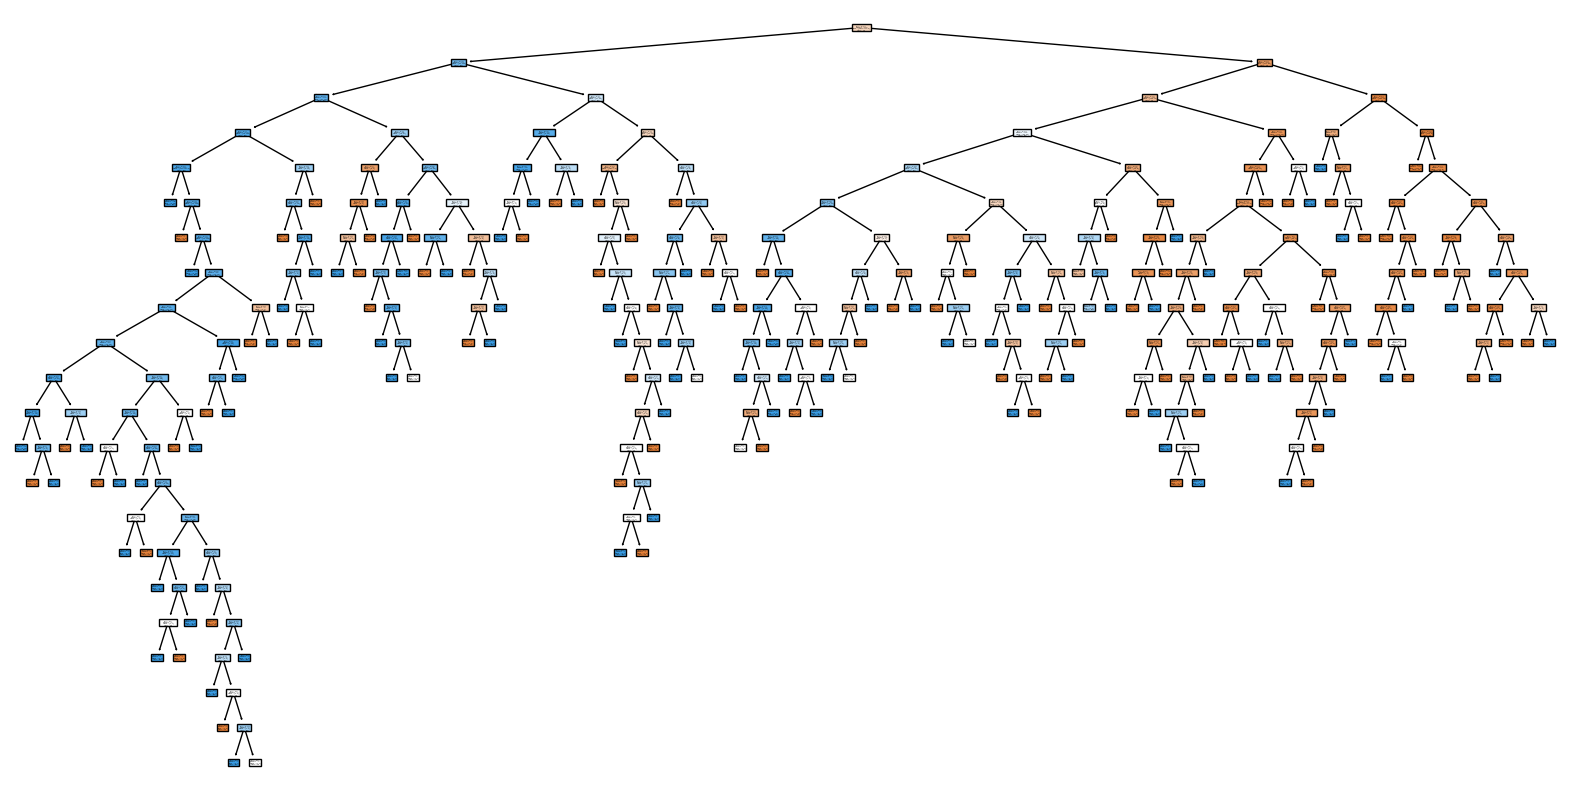

162

In [35]:
# Create a plot of the tree, and interpret the results.
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(OJ_tree, filled=True, feature_names=X_train.columns, class_names=["CH", "MM"])
plt.show()

# how many terminal nodes are there?
OJ_tree.get_n_leaves()


Your answer:

~~~
Please write your answer in full sentences.


~~~

(d) Use the export_tree() function to produce a text summary of
the fitted tree. Pick one of the terminal nodes, and interpret the
information displayed.

In [36]:
# Use the export_tree() function to produce a text summary of the tree.
print(OJ_tree.get_depth())
print(OJ_tree.get_n_leaves())
print(OJ_tree.get_params())
OJ_tree.tree_.value[11] 

21
162
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 1, 'splitter': 'best'}


array([[0.13253012, 0.86746988]])

(e) Predict the response on the test data, and produce a confusion
matrix comparing the test labels to the predicted test labels.
What is the test error rate?

Your code:

In [37]:
# predict the response on the test data and produce a confusion matrix. What is the test error rate?
import pandas as pd
y_pred = OJ_tree.predict(X_test)
accuracy_score(y_test, y_pred)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
test_error_rate = (confusion_matrix[0][1] + confusion_matrix[1][0]) / confusion_matrix.sum().sum()
print(confusion_matrix)
print(test_error_rate)

Predicted    0   1
Actual            
0          133  39
1           29  69
0.2518518518518518


Your answer:

~~~
Please write your answer in full sentences.


~~~

(f) Use cross-validation on the training set in order to determine
the optimal tree size.
Your code:

In [38]:
# use cross-validation on the training set in order to determine the optimal level of tree size.
from sklearn.model_selection import cross_val_score
import numpy as np
cv_scores = []
for i in range(2, 20):
    OJ_tree = DecisionTreeClassifier(max_depth=i, random_state=1)
    scores = cross_val_score(OJ_tree, X_train, y_train, cv=10, scoring="accuracy")
    cv_scores.append(scores.mean())

cv_scores = np.array(cv_scores)
optimal_tree_size = np.argmax(cv_scores) + 2
print(optimal_tree_size)

4


Your answer:

~~~
Please write your answer in full sentences.


~~~

(g) Produce a plot with tree size on the x-axis and cross-validated
classification error rate on the y-axis.
Your code:

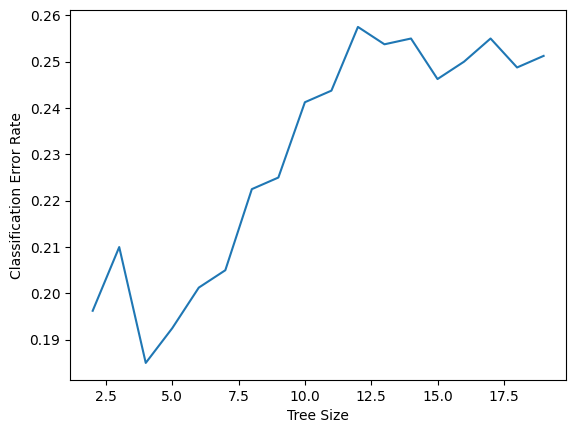

In [39]:
# produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.
import matplotlib.pyplot as plt
plt.plot(range(2, 20), 1 - cv_scores)
plt.xlabel("Tree Size")
plt.ylabel("Classification Error Rate")
plt.show()

Your answer:

~~~
Please write your answer in full sentences.


~~~

(h) Which tree size corresponds to the lowest cross-validated classification error rate?

Your code:

In [40]:
# which tree size is optimal corresponds to the smallest cross-validated classification error rate?
optimal_tree_size = np.argmax(cv_scores) + 2
print(optimal_tree_size)

4


Your answer:

~~~
Please write your answer in full sentences.


~~~

(i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead
to selection of a pruned tree, then create a pruned tree with five terminal nodes.

Your code:

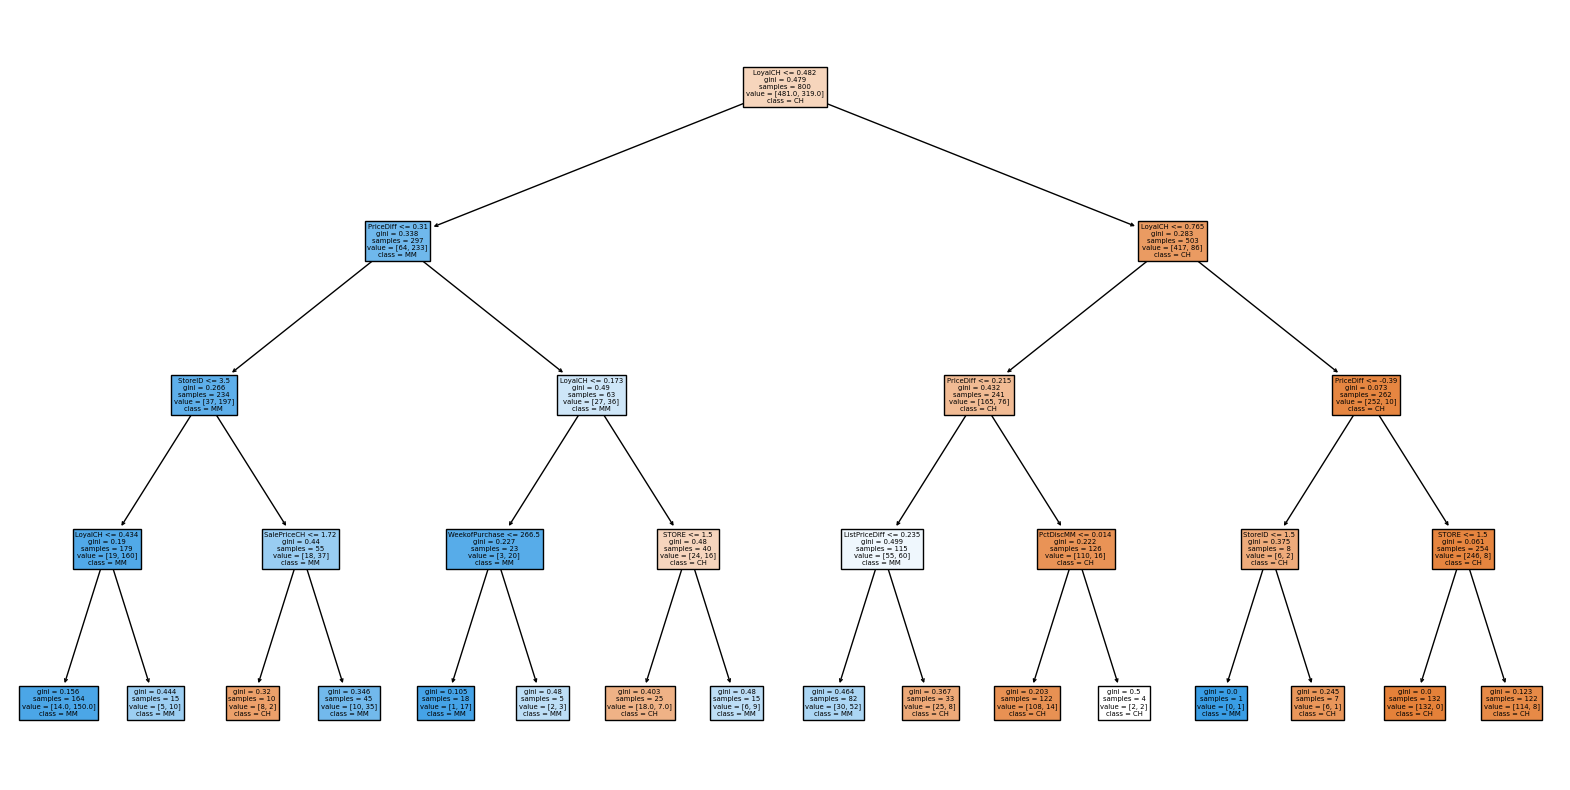

In [41]:
# Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.
OJ_pruned_tree = DecisionTreeClassifier(max_depth=optimal_tree_size, random_state=1)
OJ_pruned_tree.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(OJ_pruned_tree, filled=True, feature_names=X_train.columns, class_names=["CH", "MM"])
plt.show()

Your answer:

~~~
Please write your answer in full sentences.


~~~

(j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

Your code:

In [42]:
# compare the training error rates between the pruned and unpruned trees
# Make sure OJ_tree (unpruned tree) is defined and fitted before this comparison
OJ_tree = DecisionTreeClassifier(random_state=1)
OJ_tree.fit(X_train, y_train)  # Fit the unpruned tree
# Fit the pruned tree, as shown in your snippet
OJ_pruned_tree = DecisionTreeClassifier(max_depth=optimal_tree_size, random_state=1)
OJ_pruned_tree.fit(X_train, y_train)

y_pred_unpruned = OJ_tree.predict(X_train)
print("Unpruned Tree Accuracy:", accuracy_score(y_train, y_pred_unpruned))

y_pred_pruned = OJ_pruned_tree.predict(X_train)
print("Pruned Tree Accuracy:", accuracy_score(y_train, y_pred_pruned))

Unpruned Tree Accuracy: 0.99
Pruned Tree Accuracy: 0.8625


Your answer:

~~~
Please write your answer in full sentences.


~~~


(k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

Your code:

In [43]:
# Compare the test error rates between the pruned and unpruned trees
y_pred_unpruned = OJ_tree.predict(X_test)
print("Unpruned Tree Accuracy:", accuracy_score(y_test, y_pred_unpruned))
y_pred_pruned = OJ_pruned_tree.predict(X_test)
print("Pruned Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))

Unpruned Tree Accuracy: 0.7481481481481481
Pruned Tree Accuracy: 0.7777777777777778


Your answer:

~~~
Please write your answer in full sentences.


~~~

### Hitters

We now use boosting to predict Salary in the Hitters data set.

In [44]:
Hitters = load_data("Hitters")
print(Hitters.info())
#delete catorical data
Hitters = Hitters.drop(columns=Hitters.select_dtypes(include=['category']).columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AtBat      322 non-null    int64   
 1   Hits       322 non-null    int64   
 2   HmRun      322 non-null    int64   
 3   Runs       322 non-null    int64   
 4   RBI        322 non-null    int64   
 5   Walks      322 non-null    int64   
 6   Years      322 non-null    int64   
 7   CAtBat     322 non-null    int64   
 8   CHits      322 non-null    int64   
 9   CHmRun     322 non-null    int64   
 10  CRuns      322 non-null    int64   
 11  CRBI       322 non-null    int64   
 12  CWalks     322 non-null    int64   
 13  League     322 non-null    category
 14  Division   322 non-null    category
 15  PutOuts    322 non-null    int64   
 16  Assists    322 non-null    int64   
 17  Errors     322 non-null    int64   
 18  Salary     263 non-null    float64 
 19  NewLeague  322 non-null    ca

(a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

Your code:

In [45]:
# Remove the missing values from the data set. and log transform the Salary variable.
Hitters = Hitters.dropna()
Hitters["Salary"] = np.log(Hitters["Salary"])

Your answer:

~~~
Please write your answer in full sentences.


~~~

(b) Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.

Your code:

In [46]:
# Create a training set containing a random sample of 200 observations, and a test set containing the remaining observations.
Hitters_train = Hitters.sample(200, random_state=1)
Hitters_test = Hitters.drop(Hitters_train.index)

Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter $lambda$. Produce a plot with different shrinkage values on the x-axis and the corresponding
training set MSE on the y-axis.

Your code:

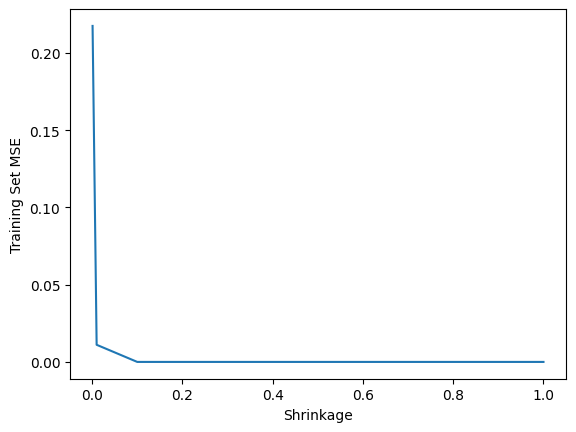

In [47]:
# Peform boosting on the training set with 1000 trees for a range of values of the shrinkage parameter λ. 
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
train_MSE = []
shrinkage = [0.001, 0.01, 0.1, 0.5, 1]

for s in shrinkage:
    Hitters_boost = GradientBoostingRegressor(n_estimators=1000, learning_rate=s, random_state=1)
    Hitters_boost.fit(Hitters_train.drop("Salary", axis=1), Hitters_train["Salary"])
    train_MSE.append(Hitters_boost.train_score_[-1])

    
# Produce a plot with λ on the x-axis and training set MSE on the y-axis.
plt.plot(shrinkage, train_MSE)
plt.xlabel("Shrinkage")
plt.ylabel("Training Set MSE")
plt.show()


Your answer:

~~~
Please write your answer in full sentences.


~~~

(d) Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

Your code:

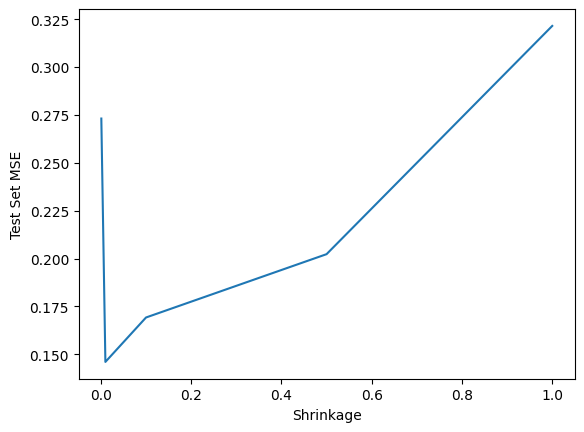

In [48]:
# produce a plot with different shirinkage values on the x-axis and the corresponding test set MSE on the y-axis
test_MSE = []
for s in shrinkage:
    Hitters_boost = GradientBoostingRegressor(n_estimators=1000, learning_rate=s, random_state=1)
    Hitters_boost.fit(Hitters_train.drop("Salary", axis=1), Hitters_train["Salary"])
    test_MSE.append(np.mean((Hitters_boost.predict(Hitters_test.drop("Salary", axis=1)) - Hitters_test["Salary"])**2))
    
plt.plot(shrinkage, test_MSE)
plt.xlabel("Shrinkage")
plt.ylabel("Test Set MSE")
plt.show()


Your answer:

~~~
Please write your answer in full sentences.


~~~

(e) Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in Chapters 3 and 6.

Your code:

In [49]:
# compare the test MSE of boosing to the test MSE that results from applying two of the regression methods.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Linear Regression
Hitters_lm = LinearRegression()
Hitters_lm.fit(Hitters_train.drop("Salary", axis=1), Hitters_train["Salary"])
Hitters_lm_pred = Hitters_lm.predict(Hitters_test.drop("Salary", axis=1))
Hitters_lm_MSE = mean_squared_error(Hitters_test["Salary"], Hitters_lm_pred)

# Lasso
from sklearn.linear_model import Lasso
Hitters_lasso = Lasso(alpha=0.01)
Hitters_lasso.fit(Hitters_train.drop("Salary", axis=1), Hitters_train["Salary"])
Hitters_lasso_pred = Hitters_lasso.predict(Hitters_test.drop("Salary", axis=1))
Hitters_lasso_MSE = mean_squared_error(Hitters_test["Salary"], Hitters_lasso_pred)

print("Boosting Test MSE:", test_MSE)
print("Linear Regression Test MSE:", Hitters_lm_MSE)
print("Lasso Test MSE:", Hitters_lasso_MSE)


Boosting Test MSE: [0.27311322679765915, 0.1460237000891115, 0.16922367516614464, 0.2022879876711078, 0.32147572875224595]
Linear Regression Test MSE: 0.31450967675999864
Lasso Test MSE: 0.3147585289230332


/opt/homebrew/Caskroom/miniforge/base/envs/yjn/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.615e+01, tolerance: 1.574e-02


Your answer:

~~~
Please write your answer in full sentences.


~~~

(f) Which variables appear to be the most important predictors in the boosted model?

Your code:

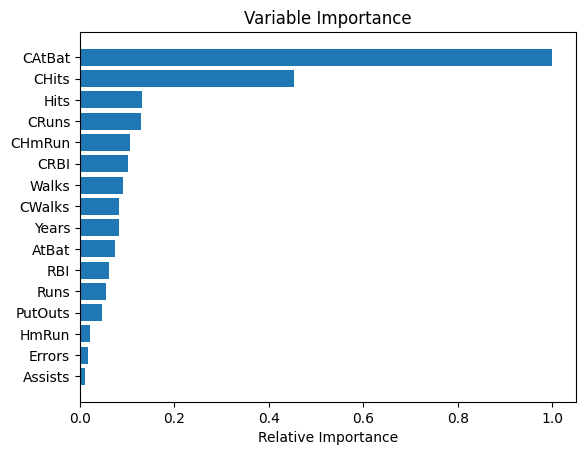

In [50]:
# which variables appera to be the most important predictors in the boosted model?
Hitters_boost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, random_state=1)
Hitters_boost.fit(Hitters_train.drop("Salary", axis=1), Hitters_train["Salary"])
feature_importance = Hitters_boost.feature_importances_
feature_importance = feature_importance / feature_importance.max()
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, Hitters_train.drop("Salary", axis=1).columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


Your answer:

~~~
Please write your answer in full sentences.


~~~

(g) Now apply bagging to the training set. What is the test set MSE for this approach?

Your code:

In [51]:
# now apply bagging to the training set. What is the test MSE for bagging?
from sklearn.ensemble import BaggingRegressor
Hitters_bag = BaggingRegressor(n_estimators=1000, random_state=1)
Hitters_bag.fit(Hitters_train.drop("Salary", axis=1), Hitters_train["Salary"])
Hitters_bag_pred = Hitters_bag.predict(Hitters_test.drop("Salary", axis=1))
Hitters_bag_MSE = mean_squared_error(Hitters_test["Salary"], Hitters_bag_pred)
print("Bagging Test MSE:", Hitters_bag_MSE)


Bagging Test MSE: 0.14028504578813322


Your answer:

~~~
Please write your answer in full sentences.


~~~

### Caravan

This question uses the `Caravan` data set.

In [52]:
Caravan = ISLP.load_data("Caravan")

(a) Create a training set consisting of the first 1,000 observations, and a test set consisting of the remaining observations.

Your code:

In [53]:
Caravan.info()
# map Purchase to 0,1
Caravan.Purchase = Caravan.Purchase.map({'No':0, 'Yes':1})
# Create a training set containing a random sample of 1000 observations, and a test set containing the remaining observations.
Caravan_train = Caravan.sample(1000, random_state=1)
Caravan_test = Caravan.drop(Caravan_train.index)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOSTYPE   5822 non-null   int64 
 1   MAANTHUI  5822 non-null   int64 
 2   MGEMOMV   5822 non-null   int64 
 3   MGEMLEEF  5822 non-null   int64 
 4   MOSHOOFD  5822 non-null   int64 
 5   MGODRK    5822 non-null   int64 
 6   MGODPR    5822 non-null   int64 
 7   MGODOV    5822 non-null   int64 
 8   MGODGE    5822 non-null   int64 
 9   MRELGE    5822 non-null   int64 
 10  MRELSA    5822 non-null   int64 
 11  MRELOV    5822 non-null   int64 
 12  MFALLEEN  5822 non-null   int64 
 13  MFGEKIND  5822 non-null   int64 
 14  MFWEKIND  5822 non-null   int64 
 15  MOPLHOOG  5822 non-null   int64 
 16  MOPLMIDD  5822 non-null   int64 
 17  MOPLLAAG  5822 non-null   int64 
 18  MBERHOOG  5822 non-null   int64 
 19  MBERZELF  5822 non-null   int64 
 20  MBERBOER  5822 non-null   int64 
 21  MBERMIDD  5822

(b) Fit a boosting model to the training set with `Purchase` as the response and the other variables as predictors. Use 1,000 trees, and a shrinkage value of 0.01. Which predictors appear to be the most important?

Your code:

In [54]:
# fit a boosting model to the training set with Purchase as the response and the other variables as predictors. Use 1000 trees, and a shrinkage value of 0.01. Which predictors appear to be the most important?
from sklearn.ensemble import GradientBoostingClassifier
X_train = Caravan_train.drop("Purchase", axis=1)
X_test = Caravan_test.drop("Purchase", axis=1)
y_train = Caravan_train["Purchase"]
y_test = Caravan_test["Purchase"]
Caravan_boost = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, random_state=1)
Caravan_boost.fit(X_train, y_train)
importances = Caravan_boost.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
# print the most important features
print(X_train.columns[indices[:5]])

Feature ranking:
Index(['ALEVEN', 'PPLEZIER', 'MBERARBG', 'MOSTYPE', 'PBRAND'], dtype='object')


Your answer:

~~~
The most important feature is ALEVEN.


~~~


(c) Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20 %. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

Your code:

In [55]:
# use the boosting model to predict the response on the test data. 
# Predict that a person will make a purchase if the estimated probability of purchase is greater than 20%.
y_pred = Caravan_boost.predict(X_test)
y_pred_prob = Caravan_boost.predict_proba(X_test)[:,1]
y_pred = (y_pred_prob > 0.2).astype(int)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
test_error_rate = (confusion_matrix[0][1] + confusion_matrix[1][0]) / confusion_matrix.sum().sum()
print(confusion_matrix)
print(test_error_rate)

# what fraction of the peaple predicted to make a purchase do in fact make one?
fraction_of_people = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1])
print(fraction_of_people)

# How does this compare with the results obtained from KNN or Logistic Regression?
# KNN
from sklearn.neighbors import KNeighborsClassifier
Caravan_knn = KNeighborsClassifier(n_neighbors=1)
Caravan_knn.fit(X_train, y_train)
y_pred = Caravan_knn.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
test_error_rate = (confusion_matrix[0][1] + confusion_matrix[1][0]) / confusion_matrix.sum().sum()
print("The KNN model")
print(confusion_matrix)
print("The test error")
print(test_error_rate)
fraction_of_people = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1])
print("The fraction: " + str(fraction_of_people))

# Logistic Regression
from sklearn.linear_model import LogisticRegression
Caravan_log = LogisticRegression(max_iter=1000)
Caravan_log.fit(X_train, y_train)
y_pred = Caravan_log.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
test_error_rate = (confusion_matrix[0][1] + confusion_matrix[1][0]) / confusion_matrix.sum().sum()
print("The logistic regression model")
print(confusion_matrix)
print("The test error")
print(test_error_rate)
fraction_of_people = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1])
print("The fraction: " + str(fraction_of_people))


Predicted     0    1
Actual              
0          4402  123
1           264   33
0.0802571547075902
0.1111111111111111
The KNN model
Predicted     0    1
Actual              
0          4288  237
1           274   23
The test error
0.10597262546661136
The fraction: 0.07744107744107744
The logistic regression model
Predicted     0   1
Actual             
0          4512  13
1           293   4
The test error
0.06345914558274575
The fraction: 0.013468013468013467


Your answer:

~~~
Please write your answer in full sentences.


~~~

## Additional Material

In this section we will look at other popular tree based methods that are readily available.
For classification we will use the [iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) .

In [56]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
iris_X=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_y=pd.DataFrame(iris.target,columns=['Class'])

# split the data
X_train0, X_test, y_train0, y_test = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)
trainData = pd.concat([X_train0, y_train0], axis=1)
testData  = pd.concat([X_test, y_test], axis=1)

### CART graph

https://github.com/Sidon/Sidon.github.io/blob/master/_posts/dtree-w1.ipynb

In [57]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

In [58]:
# Fit CART  Model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from io import StringIO
import pydotplus
import sklearn
import sklearn.metrics
from IPython.display import Image
out = StringIO()
clf = DecisionTreeClassifier()
clf = clf.fit(X_train0,y_train0)

# you will need to install graphviz
tree.export_graphviz(clf, out_file=out, feature_names=iris.feature_names,class_names=['0','1','2'],
                     filled=True, rounded=True, special_characters=True)

graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

predictions=clf.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test,predictions)
plot_confusion_matrix(confusion_matrix,['Setosa','Versicolour','Virginica'])

ModuleNotFoundError: No module named 'pydotplus'

### XGBoost

XGBoost became popular due to its success in Kaggle competitions.  It's essentially a gradient boosting but implemented to perform better out of the box.  Some of the nice features include:

- Default regularization
- Tree growing and pruning scheme allows for multiple cuts
- Computational efficiency by parallelization
- A couple of default choices to make it easier to use
- Handles missing data

However, if you want to go deeper, there are some challenges/concerns.

- Hyperparameter tuning is hard
- Missing data imputation scheme is concerning
- Cannot handle categorical variables

Here is it used for the iris data.

In [ ]:
import xgboost as xgb

param = {'max_depth': 2, 'eta': 1, 'objective': 'multi:softmax'}
param['nthread'] = 4
param['eval_metric'] = 'auc'
param['num_class'] = 3

num_round = 10

dtrain = xgb.DMatrix(X_train0, label=y_train0)
dtest = xgb.DMatrix(X_test, label=y_test)
evallist = [(dtrain, 'train'), (dtest, 'eval')]
bst = xgb.train(param, dtrain, num_round, evallist)
ypred = bst.predict(dtest)

What gets unwieldy is when you start to tune the parameters.
Here is the list of parameters used.  Not all of them need tuning, but I hope you understand.

- General Parameters that define the overall functionality of XGBoost.
  - booster [default=gbtree]: type of model
  - silent [default=0]: display log?
  - nthread [default to the maximum number of threads available if not set]: number of cores
- Learning Task Parameters define the optimization objective and the metric to be calculated at each step.
  - objective [default=reg:linear] the loss function to be minimized.
  - eval_metric [ default according to objective ] The metric for validation data.
  - seed [default=0] The random number seed.
- Booster Parameters
  - eta [default=0.3]. Analogous to the learning rate in GBM
  - min_child_weight [default=1] is the minimum sum of weights of all observations required in a child.
  - max_depth [default=6] The maximum depth of a tree, same as GBM.
  - max_leaf_nodes  The maximum number of terminal nodes or leaves in a tree.
  - gamma [default=0] is the minimum loss reduction required to make a split.
  - max_delta_step [default=0]  If it is set to a positive value makes the update step more conservative.
  - subsample [default=1] the fraction of observations randomly sampled for each tree.
  - colsample_bytree [default=1] is the fraction of columns randomly sampled for each tree.
  - colsample_bylevel [default=1] the subsample ratio of columns for each split, in each level.
  - lambda [default=1]  L2 regularization term on weights (analogous to Ridge regression)
  - alpha [default=0] L1 regularization term on weight (analogous to Lasso regression)
  - scale_pos_weight [default=1] >0 for high class imbalance as it helps in faster convergence.

Because of this, there is an automatic versiong of xgboost exists. But I was not able to install it on my machine.

In [ ]:
#from autoxgb import AutoXGB

### catboost

Catboost is another popular boosting method that in my view popular due to well thought out implementation.
The three features that distingishes itself from the other similar models are

- Symmetric tree
- Ordered Boosting
- Categorical Feature Engineering


 https://catboost.ai/en/docs/concepts/r-usages-examples

In [ ]:
# library(catboost)
# # load data
# set.seed(1)
# idx=sample(1:nrow(iris),nrow(iris)*.7)
# train=iris[idx,]
# test=iris[-idx,]
# fit_control <- caret::trainControl(
#   method = "cv",
#   number = 3,
#   search = "random",
#   classProbs = TRUE
# )
# # set grid options
# grid <- expand.grid(
#   depth = c(4, 6, 8),
#   learning_rate = 0.1,
#   l2_leaf_reg = 0.1,
#   rsm = 0.95,
#   border_count = 64,
#   iterations = 10
# )
# model <- caret::train(
#   x = train[,-5],
#   y = train[,5],
#   method = catboost.caret,
#   metric = "Accuracy",
#   maximize = TRUE,
#   preProc = NULL,
#   tuneGrid = grid,
#   tuneLength = 30,
#   trControl = fit_control
# )
# table(test$Species,predict(model,test))

### Ensemble model

Bagging, Random Forest, and Boosting are examples of ensemble models.
The idea is to combine models to get a better result than any individual model can achieve.
So far, we’ve combined the same models, but that need not be the case.
One way to combine the results is to just average the outcomes from different models.
But one need not trust the results from all models equally.
An alternative way is to use the predictions as input into a regression model to create weights representing the level of trust in the model.

Stacking is easy to implement but even easier if you use caret.
For example, if you want to do 10 fold Repeated CV to fit CART, knn, logistic regression,Gaussian Naive Bayes and svc, then combine the results.

You can find more details [here](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/).

In [ ]:
# pip install datapackage
from datapackage import Package
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

package = Package('https://datahub.io/machine-learning/sonar/datapackage.json')
resources = package.resources
Sonar = pd.read_csv(resources[1].descriptor['path'])

Sonar_y=Sonar.loc[:,"Class"]
Sonar_x=Sonar.drop(["Class"], axis=1)

level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression()
stacking = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
cv = RepeatedKFold(n_splits=10, n_repeats=3)
scores = cross_val_score(stacking, Sonar_x, Sonar_y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')